In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import numpy
from PIL import Image
from pylab import *
from skimage.feature import hog
from skimage import feature
from sklearn import datasets
import cv2
from skimage import exposure
import timeit
from skimage import transform as tf

In [2]:
#Multi-Layer Perceptron Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
        

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

MLP_network = MLP()

In [3]:
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(MLP_network.parameters(), lr=0.001, betas=(0.9,0.99), eps=1e-08, weight_decay=0.001) 

In [4]:
# transforms to apply to the mnist data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=trans)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=trans)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=10, shuffle=False, num_workers=2)

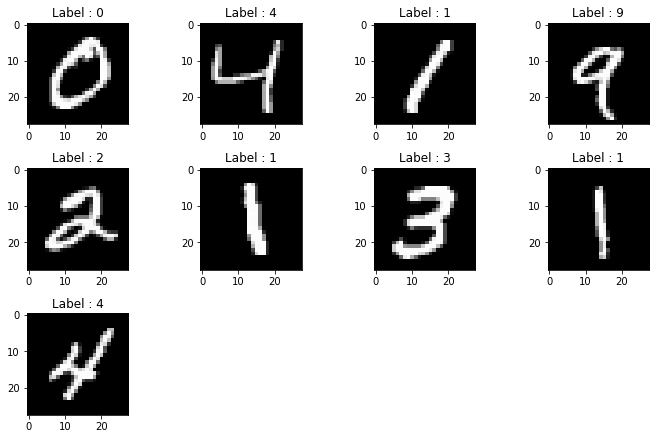

In [5]:
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(train_dataset.train_data[i].numpy(), cmap='gray')
    plt.title('Label : %i' % train_dataset.train_labels[i])
plt.show()

In [6]:
num_epochs = 20
total_step = len(train_loader)
Loss_1 = []
print('----------------------------------------------------')
start = timeit.default_timer()
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_1.append(running_loss / total_step)
print('Finished Training')
stop = timeit.default_timer()

----------------------------------------------------
Epoch 1  | Loss : 0.2273
----------------------------------------------------
Epoch 2  | Loss : 0.1408
----------------------------------------------------
Epoch 3  | Loss : 0.1234
----------------------------------------------------
Epoch 4  | Loss : 0.1149
----------------------------------------------------
Epoch 5  | Loss : 0.1106
----------------------------------------------------
Epoch 6  | Loss : 0.1081
----------------------------------------------------
Epoch 7  | Loss : 0.1048
----------------------------------------------------
Epoch 8  | Loss : 0.1030
----------------------------------------------------
Epoch 9  | Loss : 0.1031
----------------------------------------------------
Epoch 10  | Loss : 0.1003
----------------------------------------------------
Epoch 11  | Loss : 0.1021
----------------------------------------------------
Epoch 12  | Loss : 0.1005
----------------------------------------------------
Epoch 13

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the Test images: %d %%' % (100 * correct / total))

Accuracy of the network on the Test images: 94 %


In [8]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 98 %
Accuracy of class 1 : 98 %
Accuracy of class 2 : 92 %
Accuracy of class 3 : 93 %
Accuracy of class 4 : 84 %
Accuracy of class 5 : 97 %
Accuracy of class 6 : 95 %
Accuracy of class 7 : 92 %
Accuracy of class 8 : 97 %
Accuracy of class 9 : 97 %


In [9]:
train_edge = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=trans)
test_edge = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=trans)

for i in range(0,len(train_edge)):
    image = feature.canny(train_edge.train_data[i].numpy()) * 1
    train_edge.train_data[i] = torch.from_numpy(image)
    
for i in range(0,len(test_edge)):
    image = feature.canny(test_edge.test_data[i].numpy()) * 1
    test_edge.test_data[i] = torch.from_numpy(image)

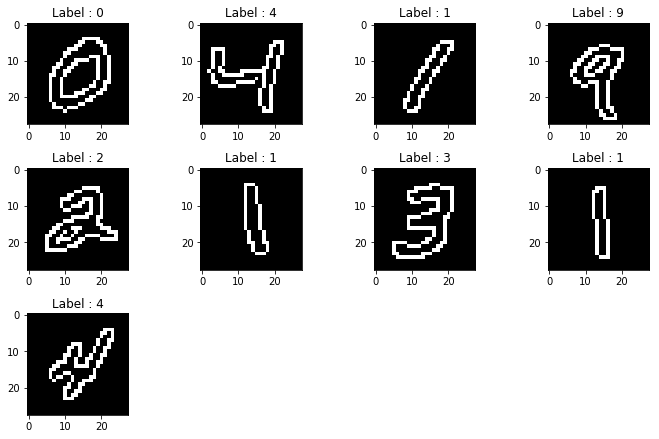

In [10]:
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(train_edge.train_data[i].numpy(), cmap='gray')
    plt.title('Label : %i' % train_edge.train_labels[i])
plt.show()


In [11]:
train_edge_loader = torch.utils.data.DataLoader(dataset=train_edge, batch_size=10, shuffle=True, num_workers=2)
test_edge_loader = torch.utils.data.DataLoader(dataset=test_edge, batch_size=10, shuffle=False, num_workers=2)

In [12]:
num_epochs = 20
total_step = len(train_edge_loader)
Loss_2 = []
print('----------------------------------------------------')
start_edge = timeit.default_timer()
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_edge_loader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_2.append(running_loss / total_step)
print('Finished Training')
stop_edge = timeit.default_timer()

----------------------------------------------------
Epoch 1  | Loss : 2.3060
----------------------------------------------------
Epoch 2  | Loss : 2.3027
----------------------------------------------------
Epoch 3  | Loss : 2.3032
----------------------------------------------------
Epoch 4  | Loss : 2.3031
----------------------------------------------------
Epoch 5  | Loss : 2.3028
----------------------------------------------------
Epoch 6  | Loss : 2.3031
----------------------------------------------------
Epoch 7  | Loss : 2.3029
----------------------------------------------------
Epoch 8  | Loss : 2.3028
----------------------------------------------------
Epoch 9  | Loss : 2.3028
----------------------------------------------------
Epoch 10  | Loss : 2.3032
----------------------------------------------------
Epoch 11  | Loss : 2.3028
----------------------------------------------------
Epoch 12  | Loss : 2.3029
----------------------------------------------------
Epoch 13

In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_edge_loader:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the Test images: %d %%' % (100 * correct / total))

Accuracy of the network on the Test images: 11 %


In [14]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_edge_loader:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 :  0 %
Accuracy of class 1 : 100 %
Accuracy of class 2 :  0 %
Accuracy of class 3 :  0 %
Accuracy of class 4 :  0 %
Accuracy of class 5 :  0 %
Accuracy of class 6 :  0 %
Accuracy of class 7 :  0 %
Accuracy of class 8 :  0 %
Accuracy of class 9 :  0 %


In [15]:
train_lbp = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=trans)
test_lbp = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=trans)

for i in range(0,len(train_lbp)):
    image = feature.local_binary_pattern(train_lbp.train_data[i].numpy(), P = 100, R = 50)
    train_lbp.train_data[i] = torch.from_numpy(image)
    
for i in range(0,len(test_lbp)):
    image = feature.local_binary_pattern(test_lbp.test_data[i].numpy(), P = 100, R = 50)
    test_lbp.test_data[i] = torch.from_numpy(image)


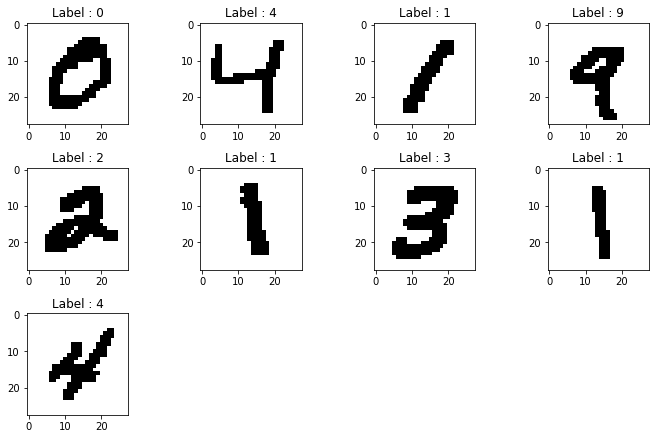

In [16]:
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(train_lbp.train_data[i].numpy(), cmap='gray')
    plt.title('Label : %i' % train_lbp.train_labels[i])
plt.show()

In [17]:
train_lbp_loader = torch.utils.data.DataLoader(train_lbp, batch_size=10, shuffle=True, num_workers=2)
test_lbp_loader = torch.utils.data.DataLoader(dataset=test_lbp, batch_size=10, shuffle=False, num_workers=2)

In [18]:
num_epochs = 20
total_step = len(train_lbp_loader)
Loss_3 = []
print('----------------------------------------------------')
start_lbp = timeit.default_timer()
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_lbp_loader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_3.append(running_loss / total_step)
print('Finished Training')
stop_lbp = timeit.default_timer()

----------------------------------------------------
Epoch 1  | Loss : 0.3974
----------------------------------------------------
Epoch 2  | Loss : 0.2352
----------------------------------------------------
Epoch 3  | Loss : 0.2063
----------------------------------------------------
Epoch 4  | Loss : 0.1940
----------------------------------------------------
Epoch 5  | Loss : 0.1920
----------------------------------------------------
Epoch 6  | Loss : 0.1843
----------------------------------------------------
Epoch 7  | Loss : 0.1815
----------------------------------------------------
Epoch 8  | Loss : 0.1805
----------------------------------------------------
Epoch 9  | Loss : 0.1758
----------------------------------------------------
Epoch 10  | Loss : 0.1761
----------------------------------------------------
Epoch 11  | Loss : 0.1745
----------------------------------------------------
Epoch 12  | Loss : 0.1728
----------------------------------------------------
Epoch 13

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_lbp_loader:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the Test images: %d %%' % (100 * correct / total))

Accuracy of the network on the Test images: 95 %


In [20]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_lbp_loader:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of class 0 : 96 %
Accuracy of class 1 : 97 %
Accuracy of class 2 : 95 %
Accuracy of class 3 : 95 %
Accuracy of class 4 : 95 %
Accuracy of class 5 : 94 %
Accuracy of class 6 : 98 %
Accuracy of class 7 : 94 %
Accuracy of class 8 : 97 %
Accuracy of class 9 : 89 %


In [21]:
train_plm = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=trans)
test_plm = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=trans)

for i in range(0,len(train_plm)):
    image = feature.peak_local_max(train_plm.train_data[i].numpy(), indices = False) * 1
    train_plm.train_data[i] = torch.from_numpy(image)
    
for i in range(0,len(test_plm)):
    image = feature.peak_local_max(test_plm.test_data[i].numpy(), indices = False) * 1
    test_plm.test_data[i] = torch.from_numpy(image)


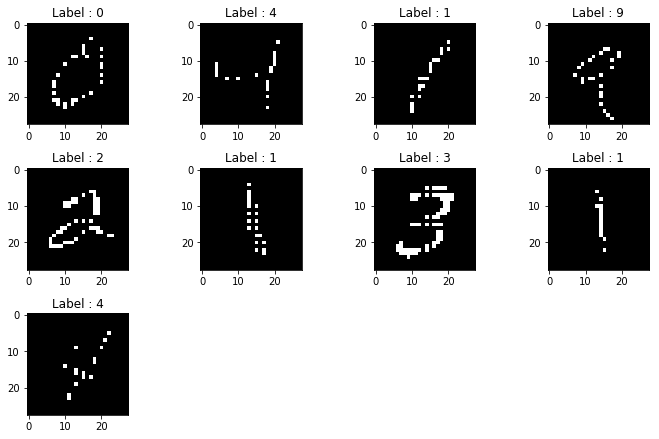

In [22]:
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(train_plm.train_data[i].numpy(), cmap='gray')
    plt.title('Label : %i' % train_lbp.train_labels[i])
plt.show()

In [23]:
train_plm_loader = torch.utils.data.DataLoader(train_plm, batch_size=10, shuffle=True, num_workers=2)
test_plm_loader = torch.utils.data.DataLoader(dataset=test_plm, batch_size=10, shuffle=False, num_workers=2)

In [24]:
num_epochs = 20
total_step = len(train_plm_loader)
Loss_4 = []
print('----------------------------------------------------')
start_plm = timeit.default_timer()
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_plm_loader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_4.append(running_loss / total_step)
print('Finished Training')
stop_plm = timeit.default_timer()

----------------------------------------------------
Epoch 1  | Loss : 2.3066
----------------------------------------------------
Epoch 2  | Loss : 2.3029
----------------------------------------------------
Epoch 3  | Loss : 2.3031
----------------------------------------------------
Epoch 4  | Loss : 2.3029
----------------------------------------------------
Epoch 5  | Loss : 2.3030
----------------------------------------------------
Epoch 6  | Loss : 2.3031
----------------------------------------------------
Epoch 7  | Loss : 2.3030
----------------------------------------------------
Epoch 8  | Loss : 2.3032
----------------------------------------------------
Epoch 9  | Loss : 2.3030
----------------------------------------------------
Epoch 10  | Loss : 2.3028
----------------------------------------------------
Epoch 11  | Loss : 2.3029
----------------------------------------------------
Epoch 12  | Loss : 2.3031
----------------------------------------------------
Epoch 13

In [25]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_plm_loader:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the Test images: %d %%' % (100 * correct / total))

Accuracy of the network on the Test images: 11 %


In [26]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_plm_loader:
        images, labels = data
        outputs = MLP_network(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of class %s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 :  0 %
Accuracy of class 1 : 100 %
Accuracy of class 2 :  0 %
Accuracy of class 3 :  0 %
Accuracy of class 4 :  0 %
Accuracy of class 5 :  0 %
Accuracy of class 6 :  0 %
Accuracy of class 7 :  0 %
Accuracy of class 8 :  0 %
Accuracy of class 9 :  0 %


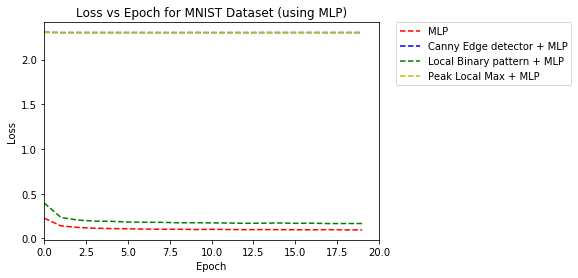

In [34]:
plt.plot(Loss_1, 'r--', label = "MLP")
plt.plot(Loss_2, 'b--', label = "Canny Edge detector + MLP")
plt.plot(Loss_3, 'g--', label = "Local Binary pattern + MLP")
plt.plot(Loss_4, 'y--', label = "Peak Local Max + MLP")
plt.title("Loss vs Epoch for MNIST Dataset (using MLP)")
plt.xlim([0, num_epochs])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [43]:
print("Computation time for classifying the data without feature extraction : %f minutes" %((stop-start)/60))
print("Computation time for classifying the data with Canny Edge Detector feature extraction method : %f mintues" %((stop_edge-start_edge)/60))
print("Computation time for classifying the data with Local Binary pattern feature extraction method : %f minutes" %((stop_lbp-start_lbp)/60))
print("Computation time for classifying the data with Peak Local Max feature extraction method : %f minutes" %((stop_plm-start_plm)/60))


Computation time for classifying the data without feature extraction : 14.562153 minutes
Computation time for classifying the data with Canny Edge Detector feature extraction method : 17.018802 mintues
Computation time for classifying the data with Local Binary pattern feature extraction method : 14.409197 minutes
Computation time for classifying the data with Peak Local Max feature extraction method : 16.451347 minutes
